<a href="https://colab.research.google.com/github/Ahnaf20/Kelompok-4/blob/main/Kelompok_4_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AlfaIndo**
AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Tangerang, Surabaya, dan Medan. Anda adalah seorang Data Analyst yang bekerja di kantor pusat AlfaIndo di Jakarta. Pasca masa pandemi Toko AlfaIndo cabang UIN Ciputat mengalami penurunan laba yang signifikan. Anda ditugaskan oleh pimpinan untuk membantu toko ALfaIndo cabang UIN Ciputat untuk bangkit dari keterpurukannya.

In [ ]:
# import modul yang akan digunakan
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import MinMaxScaler
from mlxtend.frequent_patterns import apriori, association_rules
import re
import networkx as nx
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
import tau_unsup as tau

sns.set(style="ticks", color_codes=True)
random_state = 99

--2022-10-26 05:14:48--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.7’

tau_unsup.py.7      100%[===================>]  16.98K  --.-KB/s    in 0s      

2022-10-26 05:14:48 (38.4 MB/s) - ‘tau_unsup.py.7’ saved [17387/17387]



In [ ]:
# Warning install "mlxtend" module first. Jalankan cell ini Hanya jika menggunakan Google Colaboratory:
# Jika menggunakan Jupyter notebook secara lokal (e.g. Anaconda/WinPython) silahkan install lewat terminal (e.g. command prompt)
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend 
except:
    print("Running the code locally, make sure to install required modules.")#IN_COLAB = False

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.7/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [ ]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/Ahnaf20/Kelompok-4/main/CASE3.csv
df = pd.read_csv("data/CASE3.csv", low_memory = False, encoding='utf8')
df.shape

mkdir: cannot create directory ‘data’: File exists
--2022-10-26 05:14:57--  https://raw.githubusercontent.com/Ahnaf20/Kelompok-4/main/CASE3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1706 (1.7K) [text/plain]
Saving to: ‘data/CASE3.csv.7’

CASE3.csv.7         100%[===================>]   1.67K  --.-KB/s    in 0s      

2022-10-26 05:14:57 (18.5 MB/s) - ‘data/CASE3.csv.7’ saved [1706/1706]



(56, 7)

In [ ]:
df.ffill(inplace=True)  

In [ ]:
# Kita akan cek apakah ada missing values dari data tersebut.
df.isnull().sum()

ID Transaksi    0
Tanggal         0
Konsumen        0
ID Produk       0
Nama Produk     0
Merek           0
Jumlah          0
dtype: int64

Terlihat bahwa tidak terdapat missing value dari data. Berikutnya akan diperiksa apakah terdapat duplikasi data.

In [ ]:
df.duplicated().sum()

0

Dari output di atas terlihat bahwa tidak terdapat duplikasi data

In [ ]:
# mengubah type data
df['ID Transaksi'] = df['ID Transaksi'].astype('int64')
df['Konsumen'] = df['Konsumen'].astype('category')
df['ID Produk'] = df['ID Produk'].astype('category')
df['Nama Produk'] = df['Nama Produk'].astype('category')
df['Merek'] = df['Merek'].astype('category')
df['Jumlah'] = df['Jumlah'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID Transaksi  56 non-null     int64   
 1   Tanggal       56 non-null     object  
 2   Konsumen      56 non-null     category
 3   ID Produk     56 non-null     category
 4   Nama Produk   56 non-null     category
 5   Merek         56 non-null     category
 6   Jumlah        56 non-null     int64   
dtypes: category(4), int64(2), object(1)
memory usage: 3.2+ KB


# Visualisasi

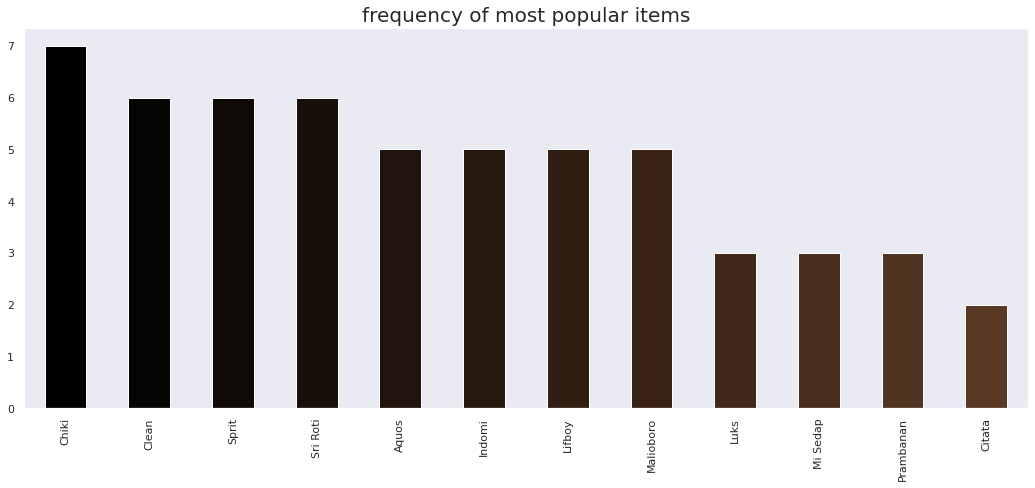

In [ ]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df['Merek'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

karena produk dengan merek Luks, Mi sedap, Prambanan, dan Citata cenderung sedikit pembeli, kami menyarankan untuk memberikan promo dan juga menata produk yang laku agar berdekatan dengan produk yang kurang laku sehingga produk yang tidak laku mempunyai peluang lebih besar untuk dibeli.

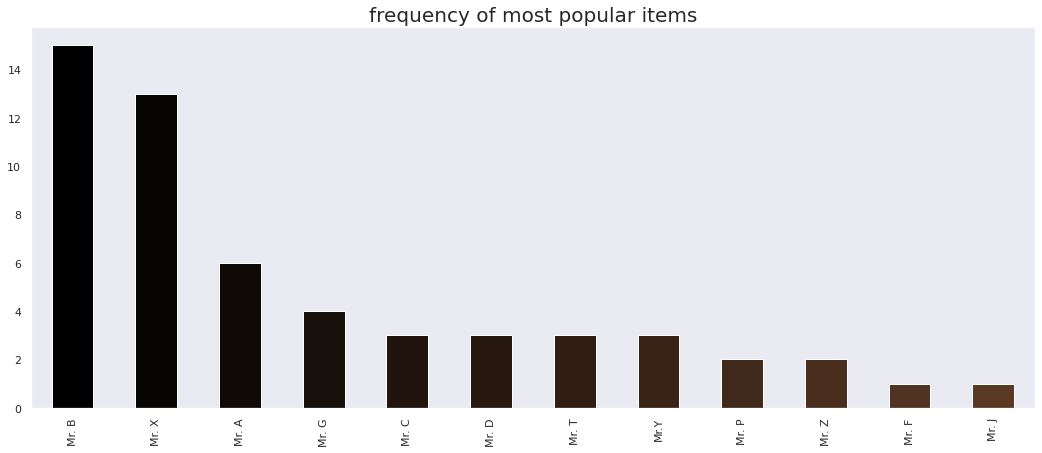

In [ ]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df['Konsumen'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Karena konsumen dengan jumlah transaksi terbanyak dilakukan oleh Mr. B dan Mr. x , kita dapat memberikan sebuah rewards atau bonus karena telah setia berbelanja di toko AlfaIndo dalam jumlah yang tidak sedikit dan kita dapat mempublikasikan pemberian rewards tersebut supaya konsumen yang lain tertarik untuk memperoleh rewards juga sehingga hal ini menjadi keuntungan bagi toko AlfaIndo.

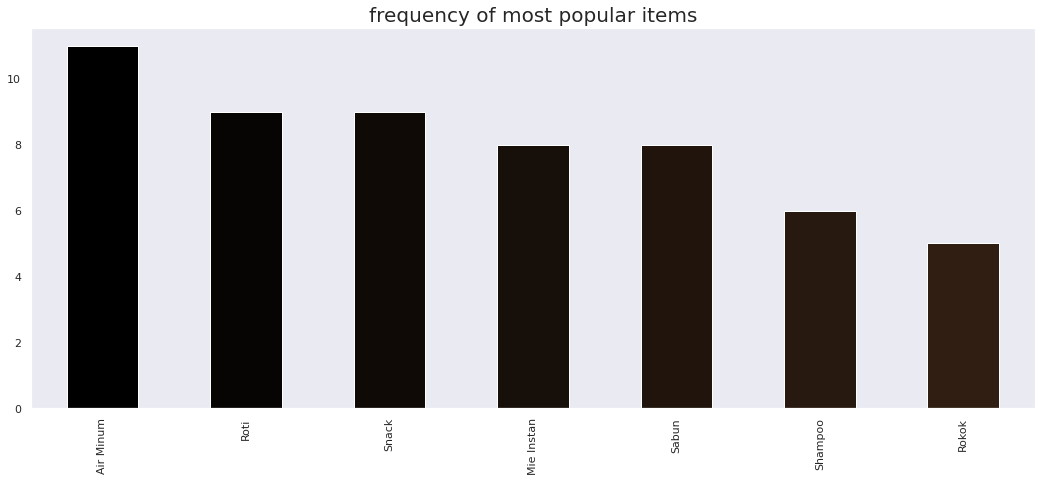

In [ ]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df['Nama Produk'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Produk paling banyak dijual adalah air minum, dan paling sedikit adalah rokok. Maka naikkan harga Air minum sedikit dan turunkan harga rokok, dan berikan promo untuk setiap pembelian air minum, diskon harga rokok.

## Market Basket Analysis

In [ ]:
# melakukan grouping data dengan kolom ID Transaksi
df2 = df.groupby('ID Transaksi')
df2.first()

,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
ID Transaksi,,,,,,
1,7/1/2022 0:00,Mr. A,1,Roti,Sri Roti,2
2,7/1/2022 0:00,Mr. B,2,Air Minum,Aquos,1
3,7/2/2022 0:00,Mr. C,4,Sabun,Lifboy,1
4,7/2/2022 0:00,Mr. B,1,Roti,Sri Roti,2
5,7/3/2022 0:00,Mr. A,6,Snack,Chiki,1
6,7/3/2022 0:00,Mr. D,11,Mie Instan,Indomi,2
7,7/4/2022 0:00,Mr. Z,10,Air Minum,Sprit,1
8,7/4/2022 0:00,Mr. B,6,Snack,Chiki,1
9,7/5/2022 0:00,Mr. X,1,Roti,Sri Roti,2


In [ ]:
# Group the transaction (untuk semua Transaksi yang dilakukan oleh Mr. B)
basket = df.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
# Jumlahkan, unstack, Null=0, index baris menggunakan Nomer Transaksi
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,3,0,2,0,0,0
2,1,0,0,1,0,1,2
3,0,0,1,0,1,1,0
4,2,2,0,2,1,0,3
5,2,0,0,0,0,0,1
6,0,2,0,0,1,1,0
7,1,0,1,0,0,0,0
8,0,3,0,0,1,1,1
9,1,2,1,2,1,0,2


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encode = basket.applymap(encode_units) # one-hot encoding
basket = basket_encode
basket

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
2,1,0,0,1,0,1,1
3,0,0,1,0,1,1,0
4,1,1,0,1,1,0,1
5,1,0,0,0,0,0,1
6,0,1,0,0,1,1,0
7,1,0,1,0,0,0,0
8,0,1,0,0,1,1,1
9,1,1,1,1,1,0,1


In [ ]:
basket.iloc[0].sum()

3

In [ ]:
frequent_itemsets = apriori(basket, min_support=0.25, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
3,0.500000,(Roti)
6,0.500000,(Snack)
4,0.444444,(Sabun)
7,0.444444,"(Roti, Air Minum)"
8,0.388889,"(Snack, Air Minum)"
1,0.333333,(Mie Instan)
5,0.333333,(Shampoo)
10,0.333333,"(Roti, Snack)"
13,0.333333,"(Roti, Snack, Air Minum)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='support', ascending=False, na_position='last', inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Roti),(Air Minum),0.500000,0.611111,0.444444,0.888889,1.454545,0.138889,3.500000
1,(Air Minum),(Roti),0.611111,0.500000,0.444444,0.727273,1.454545,0.138889,1.833333
2,(Snack),(Air Minum),0.500000,0.611111,0.388889,0.777778,1.272727,0.083333,1.750000
3,(Air Minum),(Snack),0.611111,0.500000,0.388889,0.636364,1.272727,0.083333,1.375000
8,"(Snack, Air Minum)",(Roti),0.388889,0.500000,0.333333,0.857143,1.714286,0.138889,3.500000
11,(Air Minum),"(Roti, Snack)",0.611111,0.333333,0.333333,0.545455,1.636364,0.129630,1.466667
10,(Snack),"(Roti, Air Minum)",0.500000,0.444444,0.333333,0.666667,1.500000,0.111111,1.666667
9,(Roti),"(Snack, Air Minum)",0.500000,0.388889,0.333333,0.666667,1.714286,0.138889,1.833333
7,"(Roti, Air Minum)",(Snack),0.444444,0.500000,0.333333,0.750000,1.500000,0.111111,2.000000
6,"(Roti, Snack)",(Air Minum),0.333333,0.611111,0.333333,1.000000,1.636364,0.129630,inf


Karena konsumen yang membeli roti cenderung membeli air minum juga, maka penempatan roti dan air minum sebaiknya diletakkan di tempat yang berjauhan agar konsumen bisa melihat produk yang lainnya dan tertarik untuk membeli

In [ ]:
rules.sort_values(by='support', ascending=True, na_position='last', inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(Snack),(Sabun),0.500000,0.444444,0.277778,0.555556,1.250000,0.055556,1.250000
15,(Sabun),(Shampoo),0.444444,0.333333,0.277778,0.625000,1.875000,0.129630,1.777778
14,(Shampoo),(Sabun),0.333333,0.444444,0.277778,0.833333,1.875000,0.129630,3.333333
13,(Sabun),(Mie Instan),0.444444,0.333333,0.277778,0.625000,1.875000,0.129630,1.777778
12,(Mie Instan),(Sabun),0.333333,0.444444,0.277778,0.833333,1.875000,0.129630,3.333333
16,(Sabun),(Snack),0.444444,0.500000,0.277778,0.625000,1.250000,0.055556,1.333333
4,(Roti),(Snack),0.500000,0.500000,0.333333,0.666667,1.333333,0.083333,1.500000
5,(Snack),(Roti),0.500000,0.500000,0.333333,0.666667,1.333333,0.083333,1.500000
6,"(Roti, Snack)",(Air Minum),0.333333,0.611111,0.333333,1.000000,1.636364,0.129630,inf
7,"(Roti, Air Minum)",(Snack),0.444444,0.500000,0.333333,0.750000,1.500000,0.111111,2.000000


1. Frekuensi "jika sabun terbeli maka shampoo terbeli" dan sebaliknya kecil. Hal ini menarik karena biasanya jika seseorang membeli sabun maka dia membeli shampoo dan sebaliknya. Kami memprediksi hal ini terjadi karena kurangnya jenis dan merek Shampoo dan sabun yang dijual. Orang-orang biasanya cenderung memilih-milih merek shampoo dan sabun yang ingin digunakan karena kecocokan masing-masing. Untuk itu, sebaiknya jenis dan merek shampoo serta sabun diperbanyak untuk meningkatkan penjualan.

2. Kasus menarik lainnya adalah kecilnya frekuensi "jika snack terbeli maka sabun terbeli" dan sebaliknya. Kita dapat membuat promo untuk setiap pembelian snack maka mendapatkan diskon untuk sabun sebesar sekian persen. Dan letakkan Snack sedekat mungkin dengan sabun. Karena konsumen yang membeli sabun untuk keperluan bulanan biasanya adalah ibu rumah tangga, dan biasanya ibu rumah tangga akan membawa anaknya ketika berbelanja. Maka selagi sang ibu sedang memilih milih sabun anaknya dapat mencuci mata dengan banyaknya variasi snack dan meminta kepada sang ibu untuk membelikannya.

# Kesimpulan dan Rekomendasi
## Kesimpulan :
- Produk yang paling laku dibeli oleh konsumen di toko AlfaIndo cabang UIN Ciputat adalah Air minum sedangkan produk yang kurang laku dibeli oleh konsumen adalah Rokok. 


## Rekomendasi :
- Maka untuk meningkatkan penjualan rokok penempatannya dapat diletakkan di dekat kasir dan bisa juga menambahkan korek dalam barang yang dijual